<a href="https://colab.research.google.com/github/GislaineGomes/deco_morse/blob/main/Analise_redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/Mastercard_stock_history.csv')
df2 = pd.read_csv('/content/Mastercard_stock_info.csv')
df3 = pd.read_csv('/content/BD-Completo-_1_.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2006-05-25,3.748967,4.283869,3.739664,4.279217,395343000,0.0,0.0
1,2006-05-26,4.307126,4.348058,4.103398,4.179680,103044000,0.0,0.0
2,2006-05-30,4.183400,4.184330,3.986184,4.093164,49898000,0.0,0.0
3,2006-05-31,4.125723,4.219679,4.125723,4.180608,30002000,0.0,0.0
4,2006-06-01,4.179678,4.474572,4.176887,4.419686,62344000,0.0,0.0


In [2]:
df2.head()


,zip,10577
0,sector,Financial Services
1,fullTimeEmployees,21000
2,longBusinessSummary,"Mastercard Incorporated, a technology company,..."
3,city,Purchase
4,phone,914 249 2000


In [3]:
df3.head()

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1334627184,4391657184,"Brasiliana Participaçoes (98,26%)",15969,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,15190603555,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681,dividendos,0.18,0.18,...,836,-126,-728,-18.0,710,0.68,-139,696,26.0,17.0
2,ruim,aflu afluente,energia eletrica,94653192,85653192,contour global do brasil participações ltda (9...,1898,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,281988609,243988609,"neoenergia s.a (87,84)",8,alerta,0.21,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,288766537,285766537,"admistradora fortaliza ltda (89,14%)",11290,crescimento moderado,0.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df2)

https://docs.google.com/spreadsheets/d/1-_HGZS9UFl6bMt4OUo-dMsSUXMC_muQydgc0m5vm5FE#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


Entendendo as metricas e dimensões desse google Sheets


In [4]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import math
from scipy import stats

**Quantidade de linhas que eu tenho no meu Data set

In [5]:
# prompt: Quantidade de linhas que eu tenho no meu Data set

print(f"Number of rows in df: {len(df)}")
print(f"Number of rows in df2: {len(df2)}")
print(f"Number of rows in df3: {len(df3)}")

Number of rows in df: 3872
Number of rows in df2: 150
Number of rows in df3: 377


**Preparação dos Dados** - Removendo valores Nulos


In [6]:
df.isnull().sum()
df = df.dropna()
df = df.dropna()

In [7]:
df2.isnull().sum()
df2 = df2.dropna()
df2 = df2.dropna()

In [8]:
df3.isnull().sum()
df3 = df3.dropna()
df3 = df3.dropna()

**Conhecendo o arquivo**


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3872 entries, 0 to 3871
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3872 non-null   object 
 1   Open          3872 non-null   float64
 2   High          3872 non-null   float64
 3   Low           3872 non-null   float64
 4   Close         3872 non-null   float64
 5   Volume        3872 non-null   int64  
 6   Dividends     3872 non-null   float64
 7   Stock Splits  3872 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 242.1+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   zip     117 non-null    object
 1   10577   117 non-null    object
dtypes: object(2)
memory usage: 2.7+ KB


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Situação             0 non-null      object 
 1   Empresa              0 non-null      object 
 2   Segmento             0 non-null      object 
 3   Valor de M.          0 non-null      object 
 4   EV                   0 non-null      object 
 5   Majoritar.           0 non-null      object 
 6   Pes. Fisicas         0 non-null      object 
 7   Categoria            0 non-null      object 
 8   LPA                  0 non-null      float64
 9   LPA desconctado      0 non-null      float64
 10  VPA                  0 non-null      float64
 11  P/L                  0 non-null      float64
 12  P/L descontado       0 non-null      float64
 13  EV/EBITDA            0 non-null      float64
 14  P/VPA                0 non-null      float64
 15  DPA                  0 non-null      float64
 16  Dividen

***Entendendo o Minimo, Maximo e Mediana***

In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3872.000000,3872.000000,3872.000000,3872.000000,3.872000e+03,3872.000000,3872.000000
mean,104.896814,105.956054,103.769349,104.882714,1.232250e+07,0.002329,0.002583
std,106.245511,107.303589,105.050064,106.168693,1.759665e+07,0.025851,0.160706
min,3.748967,4.102467,3.739664,4.083861,6.411000e+05,0.000000,0.000000
25%,22.347203,22.637997,22.034458,22.300391,3.529475e+06,0.000000,0.000000
50%,70.810079,71.375896,70.224002,70.856083,5.891750e+06,0.000000,0.000000
75%,147.688448,148.645373,146.822013,147.688438,1.319775e+07,0.000000,0.000000
max,392.653890,400.521479,389.747812,394.685730,3.953430e+08,0.440000,10.000000


In [13]:
df2.describe()

,zip,10577
count,117,117
unique,117,105
top,sector,1
freq,1,2


In [14]:
df3.describe()

,LPA,LPA desconctado,VPA,P/L,P/L descontado,EV/EBITDA,P/VPA,DPA,Dividend Yield,Payout,...,ECP,Custo % da divida,EM,IPL,Liq. Corrente,Liq. Imediata,FCT,FCI/LL,CAPEX/LL,CAPEX/FCO
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***Começando analisar os dados***

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>,
        <Axes: title={'center': 'Low'}>],
       [<Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Dividends'}>],
       [<Axes: title={'center': 'Stock Splits'}>, <Axes: >, <Axes: >]],
      dtype=object)

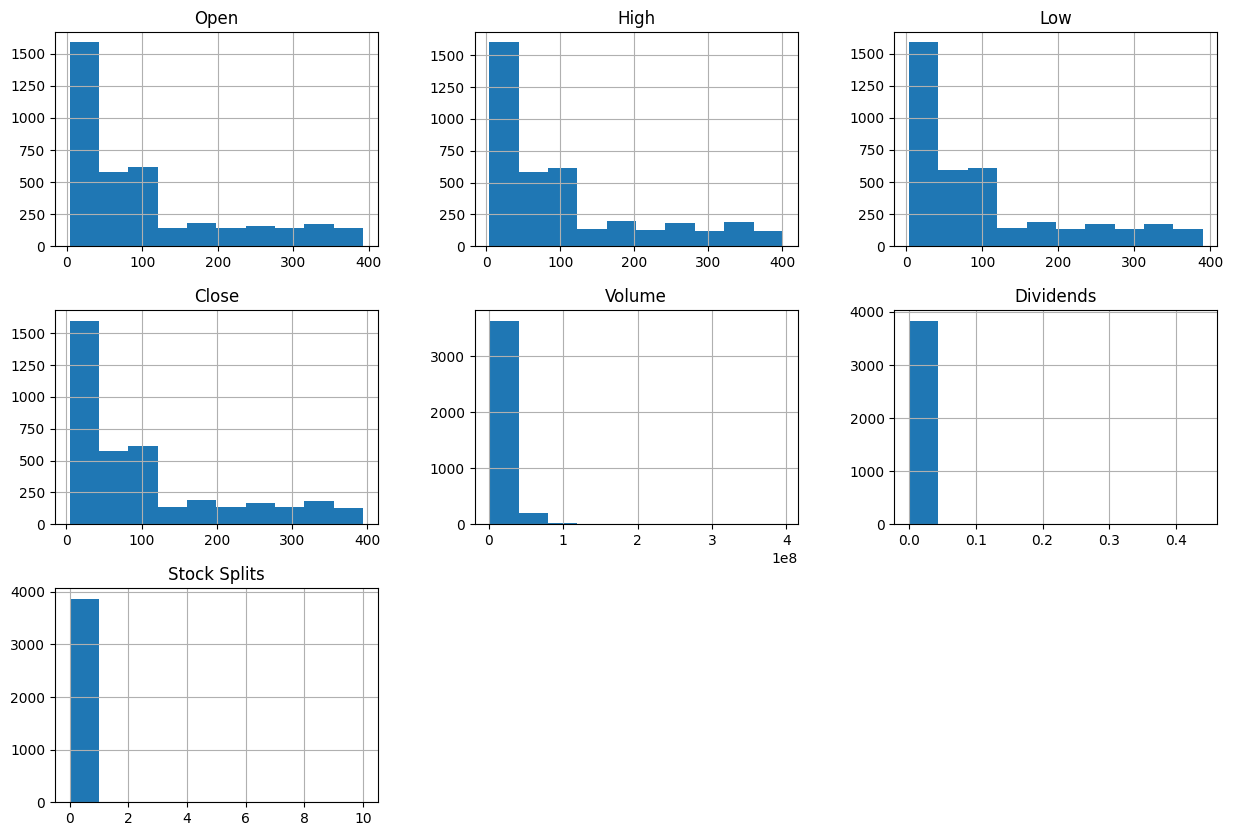

In [18]:
df.hist(figsize=(15, 10))

Os graficos, mostra o volume de ações da Mastercard negociadas diariamente. Há um aumento significativo no volume no início de 2009. Caso contrário, o volume geralmente diminuiu ao longo do tempo.

**Como as ações da mastercard se comporta ao longo do tempo. Com o retorno financeiro. **

**Criando um modelo , neste campo vamos entender o dataset do modelo. **

In [20]:
train = pd.read_csv("/content/Mastercard_stock_history.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 3872
         Date      Open      High       Low     Close     Volume  Dividends  \
0  2006-05-25  3.748967  4.283869  3.739664  4.279217  395343000        0.0   
1  2006-05-26  4.307126  4.348058  4.103398  4.179680  103044000        0.0   
2  2006-05-30  4.183400  4.184330  3.986184  4.093164   49898000        0.0   
3  2006-05-31  4.125723  4.219679  4.125723  4.180608   30002000        0.0   
4  2006-06-01  4.179678  4.474572  4.176887  4.419686   62344000        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [ ]:
train = pd.read_csv("/content/Mastercard_stock_info.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())


Quantidade de elementos de treino: 150
                   zip                                              10577
0               sector                                 Financial Services
1    fullTimeEmployees                                              21000
2  longBusinessSummary  Mastercard Incorporated, a technology company,...
3                 city                                           Purchase
4                phone                                       914 249 2000


In [21]:
train = pd.read_csv("/content/BD-Completo-_1_.csv")
print("Quantidade de elementos de treino: {}". format(len(train)))
print(train.head())

Quantidade de elementos de treino: 377
  Situação            Empresa          Segmento  Valor de M.          EV  \
0     ruim      aes elpa s.a   energia eletrica   1334627184  4391657184   
1      boa     tiet aes tiete  energia eletrica  15190603555         NaN   
2     ruim      aflu afluente  energia eletrica     94653192    85653192   
3     ruim    aflu afluente t  energia eletrica    281988609   243988609   
4     ruim  rpad alfa holding            bancos    288766537   285766537   

                                          Majoritar. Pes. Fisicas  \
0                  Brasiliana Participaçoes (98,26%)        15969   
1                 Aes Holdings Brasil ltda. (61,57%)        18681   
2  contour global do brasil participações ltda (9...         1898   
3                             neoenergia s.a (87,84)            8   
4               admistradora fortaliza ltda (89,14%)        11290   

              Categoria   LPA  LPA desconctado  ...  FCO   FCI   FCF   FCT  \
0          

In [22]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')


In [23]:
print(df2.columns)

Index(['zip', '10577'], dtype='object')


In [24]:
print(df3.columns)

Index(['Situação', 'Empresa', 'Segmento', 'Valor de M.', 'EV', 'Majoritar.',
       'Pes. Fisicas', 'Categoria', 'LPA', 'LPA desconctado', 'VPA', 'P/L',
       'P/L descontado', 'EV/EBITDA', 'P/VPA', 'DPA', 'Dividend Yield',
       'Payout', 'Margem Segurança', 'Rec. Liquida', 'Luc. Liquido',
       'Luc. Liq * NR', 'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A',
       'EBITDA', 'Margem EBITDA', 'Res. Financeiro', 'Margem Liquida', 'ROE',
       'ROA', 'SSS', 'Patri. Liquido', 'RIF', 'Margem Bancaria',
       'Indc. Eficiencia', 'Indc. Basileia', 'PDD', 'PDD/LL', 'Equity Multi.',
       'Patri. Liquido.1', 'Caixa', 'Divida bruta', 'Divida Liquida',
       'Divida Bruta/PL', 'Div Liquida/EBITDA', 'Indice de Cobertura',
       'Despesas com juros', 'EF', 'ECP', 'Custo % da divida', 'EM', 'IPL',
       'At. Circulante', 'Pas. Circulante', 'Caixa.1', 'Liq. Corrente',
       'Liq. Imediata', 'Capital de giro', 'FCO', 'FCI', 'FCF', 'FCT', 'FCL',
       'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAP

**Criando o modelo

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

x = df['Volume']
y = df.drop('Volume', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0      395343000
1      103044000
2       49898000
3       30002000
4       62344000
         ...    
395     44661000
396     41105000
397     50920000
398     10526000
399     12477000
Name: Volume, Length: 400, dtype: int64
X_teste:
 400     20166000
401      9901000
402     13115000
403     20156000
404     28994000
          ...   
3867     4724100
3868     3712000
3869     3209200
3870     2336700
3871     2766800
Name: Volume, Length: 3472, dtype: int64
y_treino:
            Date       Open       High        Low      Close  Dividends  \
0    2006-05-25   3.748967   4.283869   3.739664   4.279217        0.0   
1    2006-05-26   4.307126   4.348058   4.103398   4.179680        0.0   
2    2006-05-30   4.183400   4.184330   3.986184   4.093164        0.0   
3    2006-05-31   4.125723   4.219679   4.125723   4.180608        0.0   
4    2006-06-01   4.179678   4.474572   4.176887   4.419686        0.0   
..          ...        ...        ...        ...        ...        ..

In [28]:
x = df3['Valor de M.']
y = df3.drop('Valor de M.', axis=1)
X_treino, X_teste = x[0:600], x[600:]
y_treino, y_teste = y[0:600], y[600:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)

X_treino:
 Series([], Name: Valor de M., dtype: object)
X_teste:
 Series([], Name: Valor de M., dtype: object)
y_treino:
 Empty DataFrame
Columns: [Situação, Empresa, Segmento, EV, Majoritar., Pes. Fisicas, Categoria, LPA, LPA desconctado, VPA, P/L, P/L descontado, EV/EBITDA, P/VPA, DPA, Dividend Yield, Payout, Margem Segurança, Rec. Liquida, Luc. Liquido, Luc. Liq * NR, Resultado Bruto, Margem Bruta, EBIT, D&A, EBITDA, Margem EBITDA, Res. Financeiro, Margem Liquida, ROE, ROA, SSS, Patri. Liquido, RIF, Margem Bancaria, Indc. Eficiencia, Indc. Basileia, PDD, PDD/LL, Equity Multi., Patri. Liquido.1, Caixa, Divida bruta, Divida Liquida, Divida Bruta/PL, Div Liquida/EBITDA, Indice de Cobertura, Despesas com juros, EF, ECP, Custo % da divida, EM, IPL, At. Circulante, Pas. Circulante, Caixa.1, Liq. Corrente, Liq. Imediata, Capital de giro, FCO, FCI, FCF, FCT, FCL, FCI/LL, CAPEX, FCL CAPEX, CAPEX/LL, CAPEX/FCO]
Index: []

[0 rows x 69 columns]
y_teste:
 Empty DataFrame
Columns: [Situação, Emp

In [32]:
x = df['High']
y = df.drop('High', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0       4.283869
1       4.348058
2       4.184330
3       4.219679
4       4.474572
         ...    
395    19.921988
396    20.296110
397    19.861197
398    20.010851
399    19.711550
Name: High, Length: 400, dtype: float64
X_teste:
 400      20.198839
401      19.965950
402      20.334461
403      20.603826
404      20.113733
           ...    
3867    348.130138
3868    348.439763
3869    357.899994
3870    360.369995
3871    354.880005
Name: High, Length: 3472, dtype: float64
y_treino:
            Date       Open        Low      Close     Volume  Dividends  \
0    2006-05-25   3.748967   3.739664   4.279217  395343000        0.0   
1    2006-05-26   4.307126   4.103398   4.179680  103044000        0.0   
2    2006-05-30   4.183400   3.986184   4.093164   49898000        0.0   
3    2006-05-31   4.125723   4.125723   4.180608   30002000        0.0   
4    2006-06-01   4.179678   4.176887   4.419686   62344000        0.0   
..          ...        ...        ...        ..

In [31]:
x = df['Close']
y = df.drop('Close', axis=1)
X_treino, X_teste = x[0:400], x[400:]
y_treino, y_teste = y[0:400], y[400:]

print("X_treino:\n", X_treino)
print("X_teste:\n", X_teste)
print("y_treino:\n", y_treino)
print("y_teste:\n", y_teste)


X_treino:
 0       4.279217
1       4.179680
2       4.093164
3       4.180608
4       4.419686
         ...    
395    19.860258
396    19.337421
397    19.861197
398    19.839689
399    19.592766
Name: Close, Length: 400, dtype: float64
X_teste:
 400      19.644203
401      19.641399
402      20.127760
403      20.079121
404      19.839689
           ...    
3867    342.776886
3868    348.250000
3869    353.910004
3870    354.959991
3871    347.149994
Name: Close, Length: 3472, dtype: float64
y_treino:
            Date       Open       High        Low     Volume  Dividends  \
0    2006-05-25   3.748967   4.283869   3.739664  395343000        0.0   
1    2006-05-26   4.307126   4.348058   4.103398  103044000        0.0   
2    2006-05-30   4.183400   4.184330   3.986184   49898000        0.0   
3    2006-05-31   4.125723   4.219679   4.125723   30002000        0.0   
4    2006-06-01   4.179678   4.474572   4.176887   62344000        0.0   
..          ...        ...        ...        

Quantidade de vezes que vamos testar o modelo

In [34]:
X_teste.shape

(3472,)

In [35]:
X_treino.shape

(400,)

In [40]:
import yfinance as yf

Trazendo informação da bolsa

In [41]:
acoes = ['MA','AAPL','GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']


*  BOVA = Indice composto por vparias empresas brasileiras (Bovespa);
*  TOTS = Empresa brasileira de tecnologia (Bovespa);
*  MGLU = Empresa brasileira de comércio varegista (Bovespa);
*  WEGE = Empres brasileira de fabricação de motorores (Bovespa);
*  GOL = Empresa brasileira de linhas áreas (Bovespa);
*  CVC = Empresa brasileira de turismo (Bovespa);
*  MA = Corporação Americana de serviços financeiros (Dow Jones);


Baixando dados de ações

In [44]:
acoes_df = pd.DataFrame()
for acao in acoes:
    print(f"Baixando dados de {acao}...")
    df = yf.download(acao, start='2015-01-01', progress=False)
    acoes_df[acao] = df['Close']
    print(acoes_df.head())

Baixando dados de MA...
                                  MA
Date                                
2015-01-02 00:00:00+00:00  85.680000
2015-01-05 00:00:00+00:00  83.269997
2015-01-06 00:00:00+00:00  83.089996
2015-01-07 00:00:00+00:00  84.220001
2015-01-08 00:00:00+00:00  85.529999
Baixando dados de AAPL...
                                  MA       AAPL
Date                                           
2015-01-02 00:00:00+00:00  85.680000  27.332500
2015-01-05 00:00:00+00:00  83.269997  26.562500
2015-01-06 00:00:00+00:00  83.089996  26.565001
2015-01-07 00:00:00+00:00  84.220001  26.937500
2015-01-08 00:00:00+00:00  85.529999  27.972500
Baixando dados de GOLL4.SA...
                                  MA       AAPL  GOLL4.SA
Date                                                     
2015-01-02 00:00:00+00:00  85.680000  27.332500     14.99
2015-01-05 00:00:00+00:00  83.269997  26.562500     14.85
2015-01-06 00:00:00+00:00  83.089996  26.565001     15.21
2015-01-07 00:00:00+00:00  84.22000

In [45]:
acoes_df

,MA,AAPL,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,,,
2015-01-02 00:00:00+00:00,85.680000,27.332500,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05 00:00:00+00:00,83.269997,26.562500,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06 00:00:00+00:00,83.089996,26.565001,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07 00:00:00+00:00,84.220001,26.937500,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08 00:00:00+00:00,85.529999,27.972500,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...,...
2024-11-18 00:00:00+00:00,521.630005,228.020004,1.22,2.310000,54.000000,9.230000,29.830000,124.410004
2024-11-19 00:00:00+00:00,519.460022,228.279999,1.35,2.370000,54.130001,9.380000,30.440001,124.879997
2024-11-20 00:00:00+00:00,512.539978,229.000000,NaN,NaN,NaN,NaN,NaN,NaN


trazendo os dados de uma coluna pelas açoes

In [47]:
acoes_df = acoes_df.rename(columns={'MA': 'MasterCard','AAPL': 'Apple','GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})
acoes_df.head()

,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,,,
2015-01-02 00:00:00+00:00,85.680000,27.332500,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
2015-01-05 00:00:00+00:00,83.269997,26.562500,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2015-01-06 00:00:00+00:00,83.089996,26.565001,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
2015-01-07 00:00:00+00:00,84.220001,26.937500,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
2015-01-08 00:00:00+00:00,85.529999,27.972500,14.27,11.662282,5.905769,2.244776,10.968824,48.509998


In [48]:
acoes_df.isnull().sum()

,0
MasterCard,0
Apple,0
GOL,91
CVC,91
WEGE,91
MGLU,91
TOTS,91
BOVA,116


In [51]:
acoes_df.dropna(inplace=True)

In [52]:
acoes_df.isnull().sum()

,0
MasterCard,0
Apple,0
GOL,0
CVC,0
WEGE,0
MGLU,0
TOTS,0
BOVA,0


In [53]:
acoes_df.to_csv('acoes.csv')

In [54]:
df = pd.read_csv('acoes.csv')
acoes_df = df
acoes_df

,Date,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02 00:00:00+00:00,85.680000,27.332500,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05 00:00:00+00:00,83.269997,26.562500,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06 00:00:00+00:00,83.089996,26.565001,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07 00:00:00+00:00,84.220001,26.937500,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08 00:00:00+00:00,85.529999,27.972500,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...,...,...
2370,2024-11-14 00:00:00+00:00,520.400024,228.220001,1.17,2.300000,54.349998,9.000000,30.000000,124.269997
2371,2024-11-18 00:00:00+00:00,521.630005,228.020004,1.22,2.310000,54.000000,9.230000,29.830000,124.410004
2372,2024-11-19 00:00:00+00:00,519.460022,228.279999,1.35,2.370000,54.130001,9.380000,30.440001,124.879997
2373,2024-11-21 00:00:00+00:00,515.099976,228.520004,1.53,2.400000,53.730000,9.140000,29.920000,123.599998


In [77]:
acoes_df.columns[1:]

Index(['MasterCard', 'Apple', 'GOL', 'CVC', 'WEGE', 'MGLU', 'TOTS', 'BOVA'], dtype='object')

In [78]:
acoes_df.describe()

,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA
count,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000,2375.000000
mean,261.405348,95.501437,13.269916,19.252425,21.645964,55.571201,20.158163,88.750552
std,125.537014,63.997431,9.406178,14.221763,14.897063,66.811187,9.598497,26.130557
min,80.739998,22.584999,0.980000,1.710000,4.942307,0.286077,7.138862,36.450001
25%,122.985001,37.445000,6.510000,7.570265,7.376923,9.235000,10.348197,63.720001
50%,279.369995,66.592499,10.500000,15.783230,16.799999,28.901491,19.628439,95.540001
75%,360.789993,151.794998,19.315001,28.793062,35.977499,65.192036,28.854547,110.419998
max,530.119995,236.479996,43.790001,53.407486,57.189999,256.746246,40.500488,133.619995


Visualizando e entendendo os valores comuns

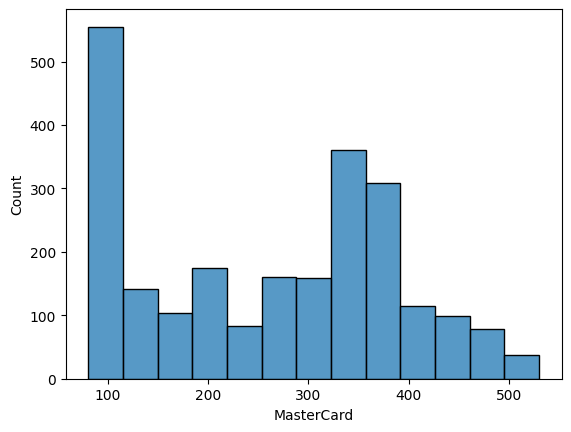

In [79]:
sns.histplot(acoes_df['MasterCard']);

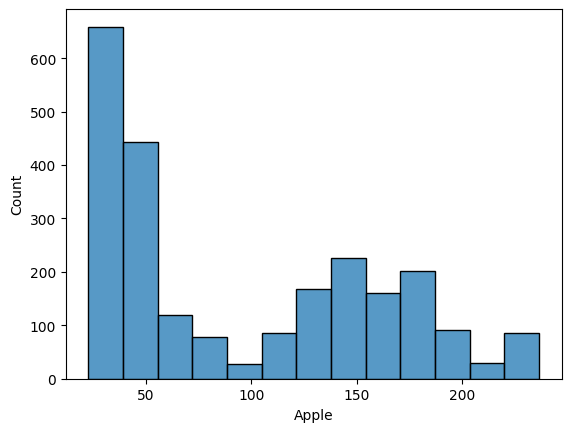

In [80]:
sns.histplot(acoes_df['Apple']);

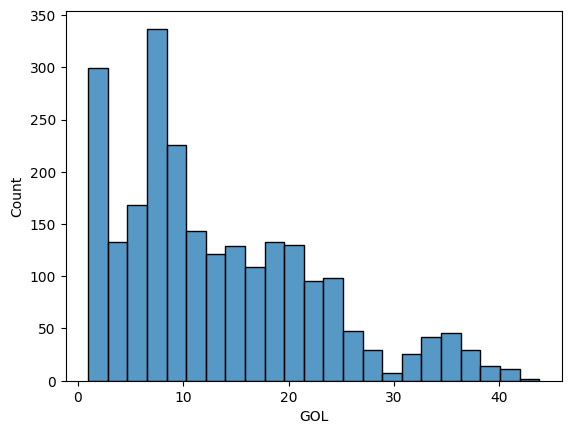

In [81]:
sns.histplot(acoes_df['GOL']);

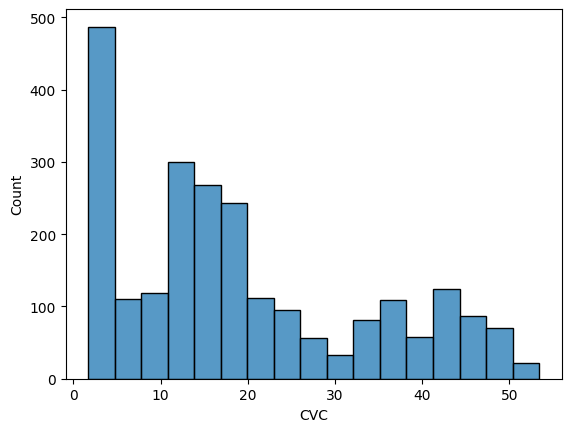

In [82]:
sns.histplot(acoes_df['CVC']);

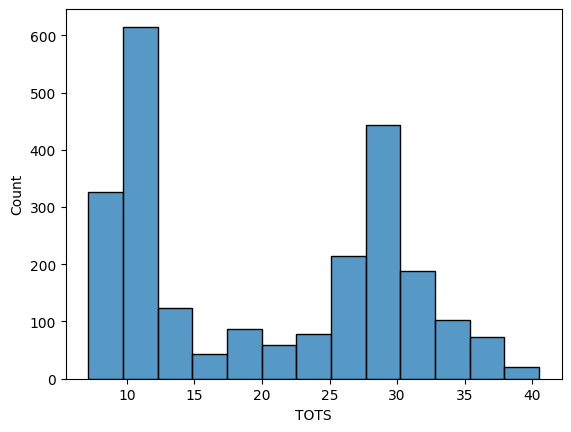

In [84]:
sns.histplot(acoes_df['TOTS']);

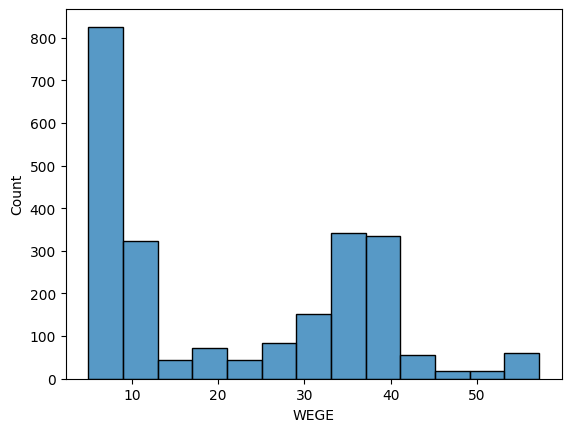

In [85]:
sns.histplot(acoes_df['WEGE']);

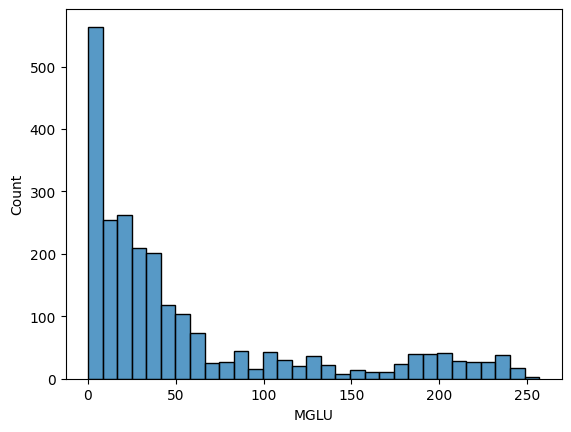

In [87]:
sns.histplot(acoes_df['MGLU']);

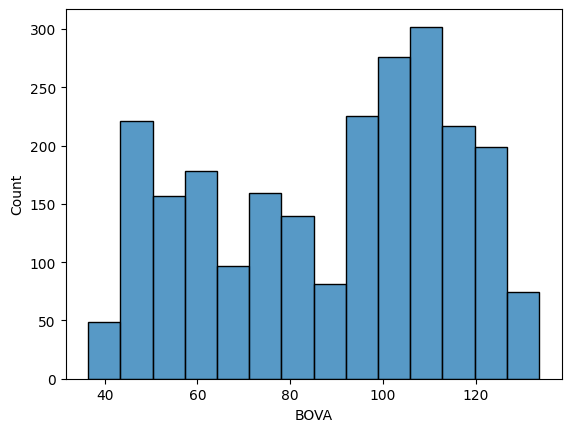

In [86]:
sns.histplot(acoes_df['BOVA']);

In [88]:
np.arange(1, len(acoes_df.columns))

array([1, 2, 3, 4, 5, 6, 7, 8])

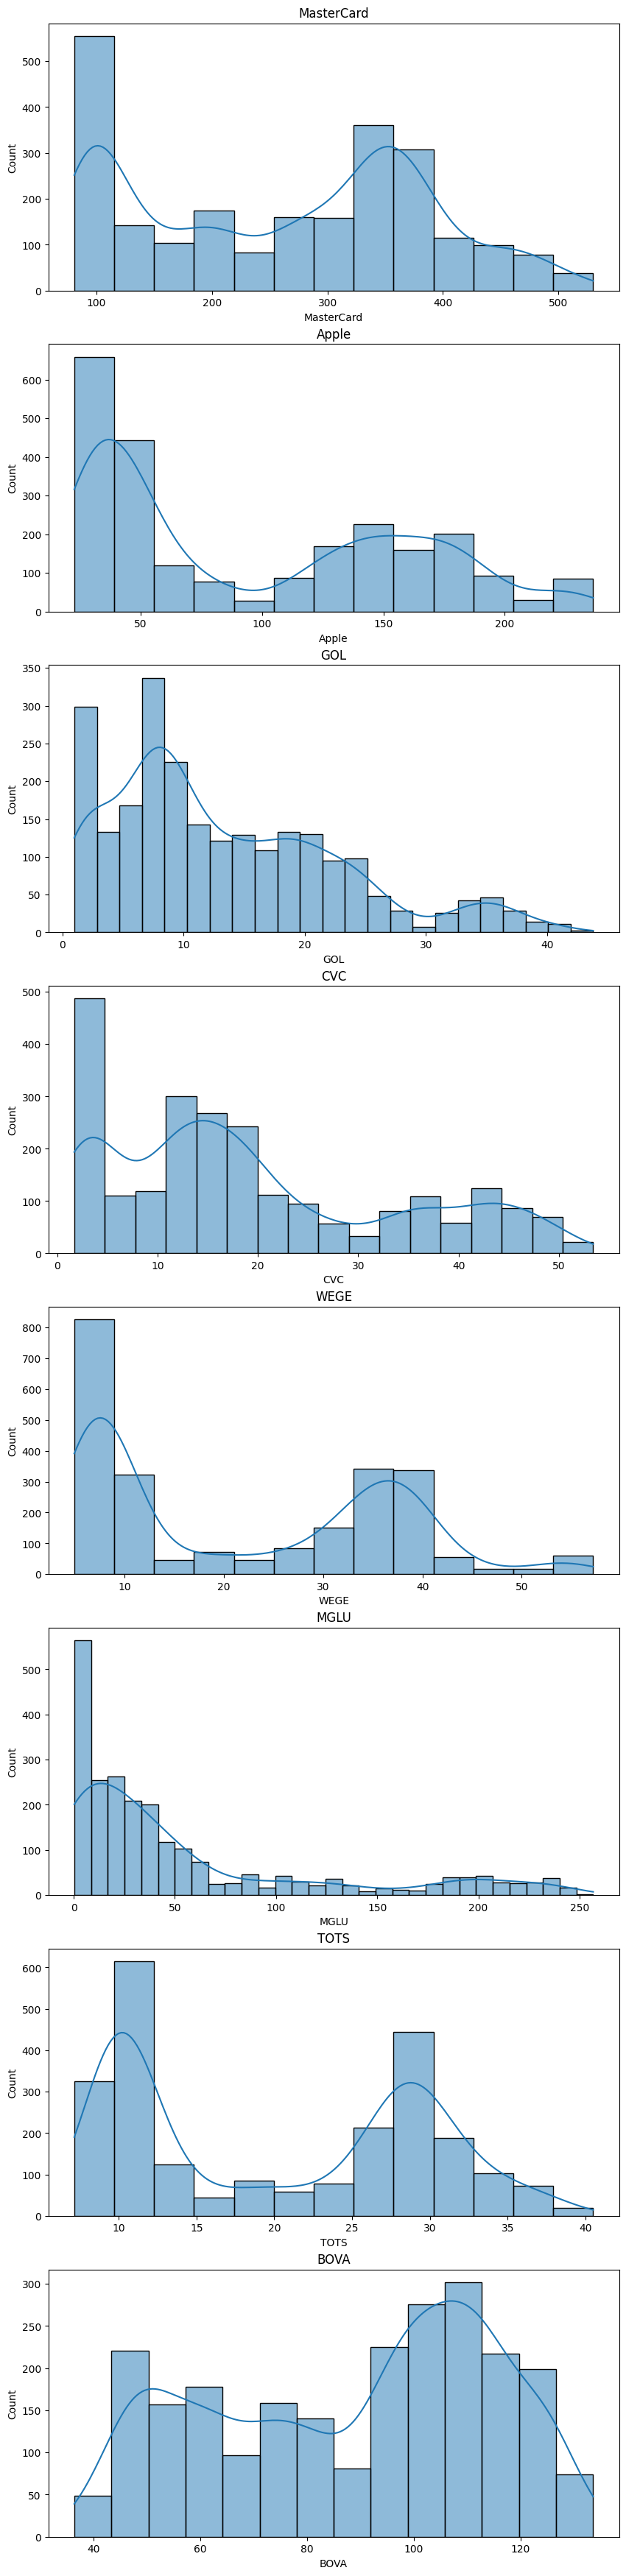

In [89]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(9, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])

In [90]:
acoes_df['MasterCard'].describe()

,MasterCard
count,2375.000000
mean,261.405348
std,125.537014
min,80.739998
25%,122.985001
50%,279.369995
75%,360.789993
max,530.119995


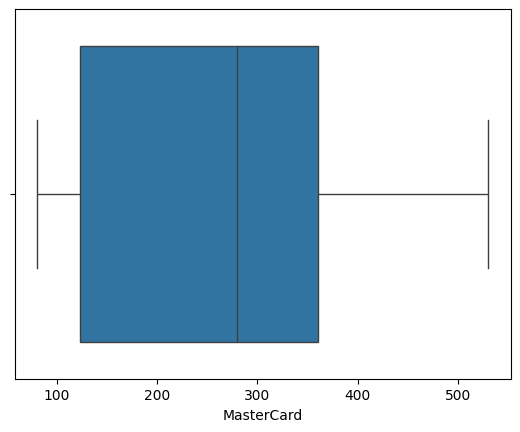

In [91]:
sns.boxplot(x = acoes_df['MasterCard']);

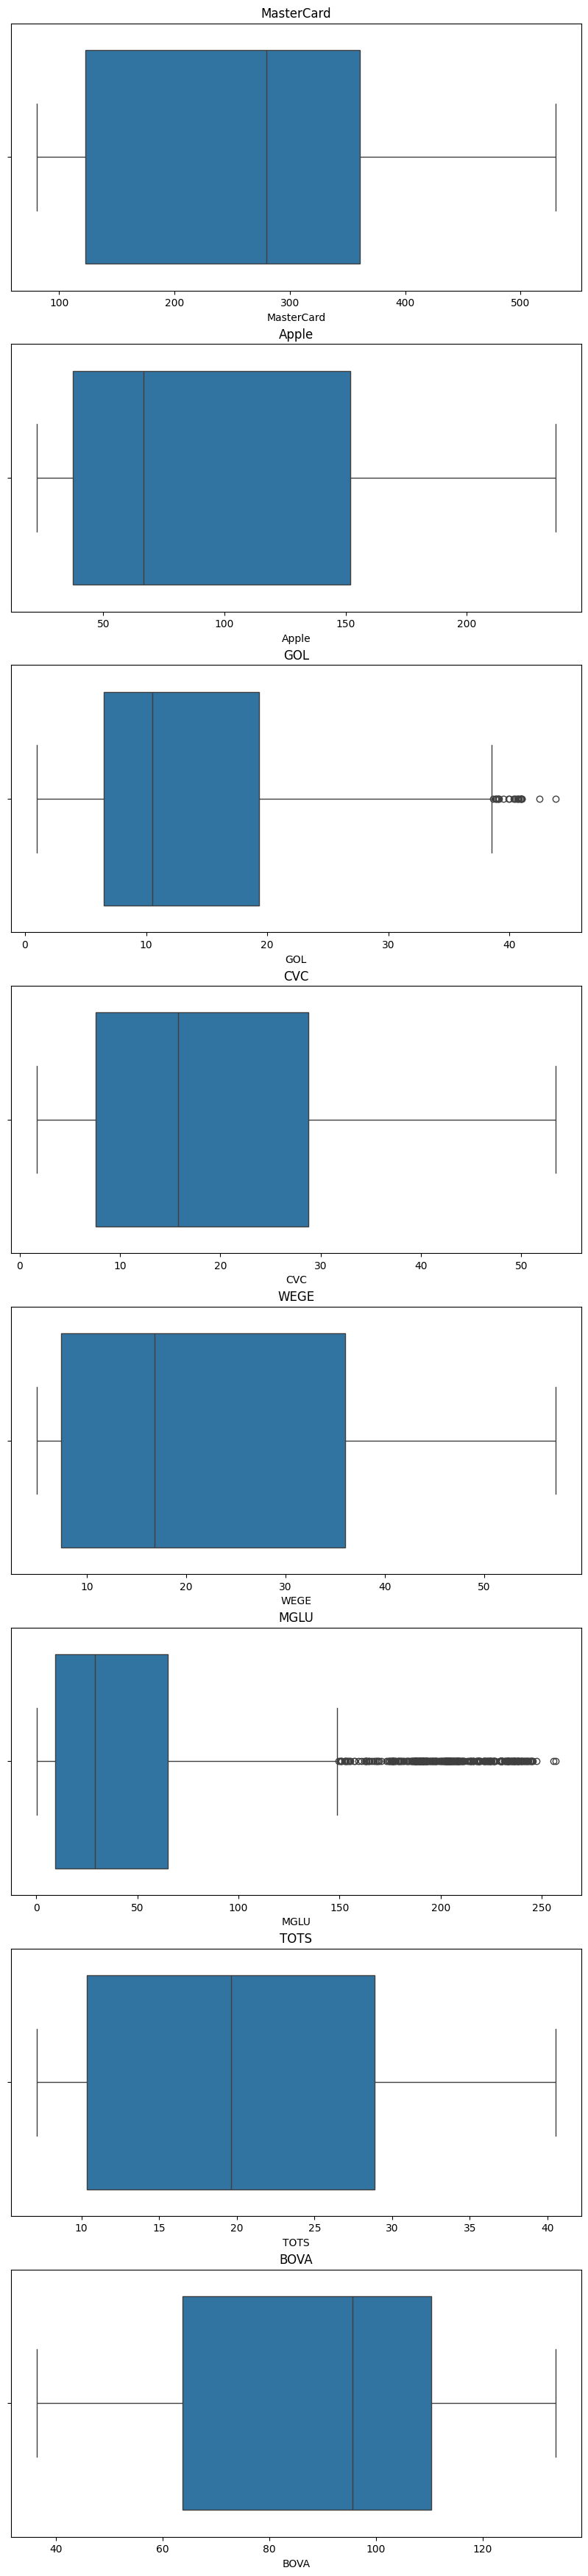

In [93]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(9, 1, i + 1)
  sns.boxplot(x = acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])

Dados historicos das ações

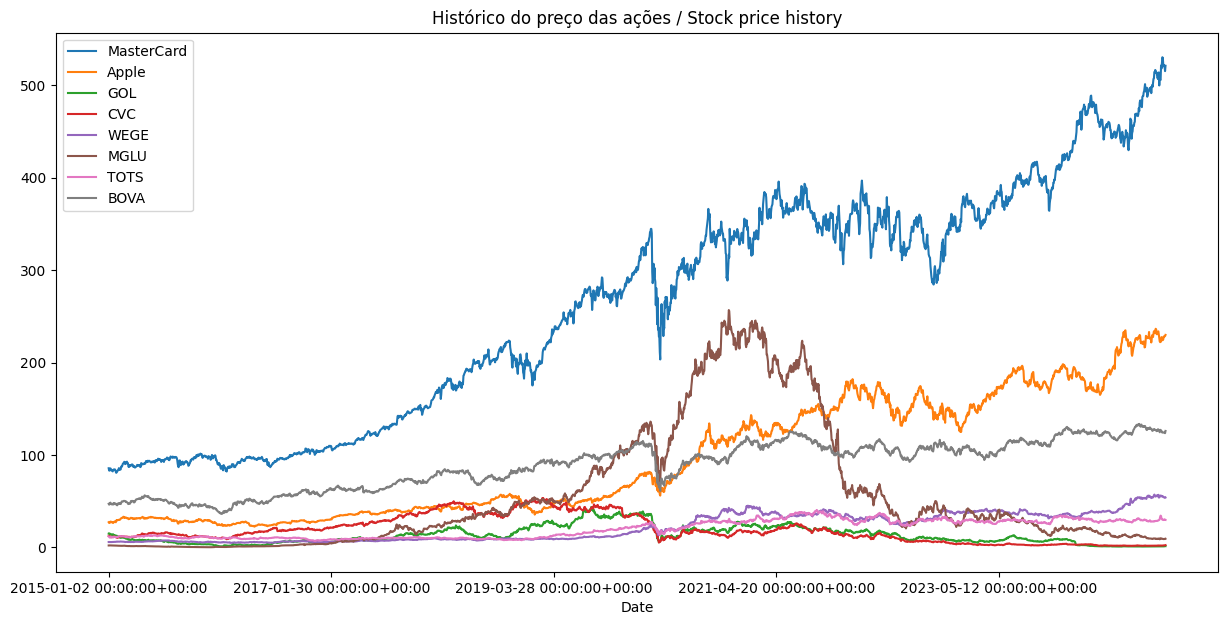

In [94]:
acoes_df.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações / Stock price history');

In [95]:
acoes_df

,Date,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02 00:00:00+00:00,85.680000,27.332500,14.99,12.527681,5.923076,2.177549,11.881510,47.259998
1,2015-01-05 00:00:00+00:00,83.269997,26.562500,14.85,12.362843,5.963461,2.218470,11.516435,46.320000
2,2015-01-06 00:00:00+00:00,83.089996,26.565001,15.21,12.198006,5.875000,2.189241,10.796243,46.580002
3,2015-01-07 00:00:00+00:00,84.220001,26.937500,14.55,12.090861,5.807692,2.262313,10.719909,48.150002
4,2015-01-08 00:00:00+00:00,85.529999,27.972500,14.27,11.662282,5.905769,2.244776,10.968824,48.509998
...,...,...,...,...,...,...,...,...,...
2370,2024-11-14 00:00:00+00:00,520.400024,228.220001,1.17,2.300000,54.349998,9.000000,30.000000,124.269997
2371,2024-11-18 00:00:00+00:00,521.630005,228.020004,1.22,2.310000,54.000000,9.230000,29.830000,124.410004
2372,2024-11-19 00:00:00+00:00,519.460022,228.279999,1.35,2.370000,54.130001,9.380000,30.440001,124.879997
2373,2024-11-21 00:00:00+00:00,515.099976,228.520004,1.53,2.400000,53.730000,9.140000,29.920000,123.599998


Normalização dos dados

In [96]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [97]:
acoes_df_normalizado

,Date,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02 00:00:00+00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05 00:00:00+00:00,0.971872,0.971828,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06 00:00:00+00:00,0.969771,0.971920,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07 00:00:00+00:00,0.982960,0.985548,0.970647,0.965132,0.980520,1.038926,0.902235,1.018832
4,2015-01-08 00:00:00+00:00,0.998249,1.023415,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449
...,...,...,...,...,...,...,...,...,...
2370,2024-11-14 00:00:00+00:00,6.073763,8.349767,0.078052,0.183593,9.175975,4.133087,2.524932,2.629496
2371,2024-11-18 00:00:00+00:00,6.088119,8.342449,0.081388,0.184392,9.116884,4.238711,2.510624,2.632459
2372,2024-11-19 00:00:00+00:00,6.062792,8.351962,0.090060,0.189181,9.138833,4.307596,2.561964,2.642404
2373,2024-11-21 00:00:00+00:00,6.011904,8.360743,0.102068,0.191576,9.071300,4.197380,2.518198,2.615320


O grande fenômeno da Bolsa de Valores de São Paulo é a Magalu, tendo a sua taxa de valorização superior que as maiores da bolsa Norte Americana. Porem essa ja nao e mais uma realidade porem pode observar o destaque disso

Nesta análise de dimensionalidade de proporção de ganhos, podemos visualizar no gráfico que a empresa de varejo Magalu de destaca

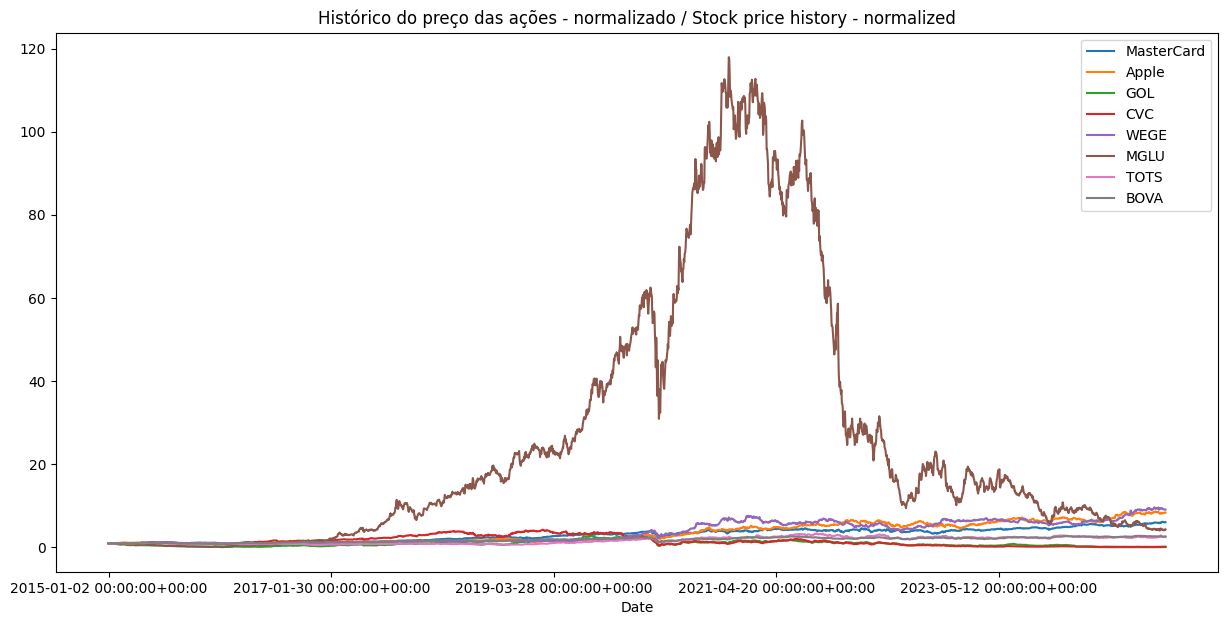

In [98]:
acoes_df_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado / Stock price history - normalized');

In [99]:
figura = px.line(title = 'Histórico do preço das ações / Stock price history')
for i in acoes_df.columns[1:]:
  figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [100]:
figura = px.line(title = 'Histórico do preço das ações - normalizado / Stock price history - normalized')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()

Taxa de Retorno


In [101]:
class color:
   BLUE = '\033[94m'
   END = '\033[0m'

In [102]:
m_i_f = acoes_df['MasterCard'][0], acoes_df['MasterCard'][len(acoes_df) - 1]
t_r = ((acoes_df['MasterCard'][len(acoes_df) - 1] - acoes_df['MasterCard'][0]) / acoes_df['MasterCard'][0]) * 100

a_i_f = acoes_df['Apple'][0], acoes_df['Apple'][len(acoes_df) - 1]
a_r = ((acoes_df['Apple'][len(acoes_df) - 1] - acoes_df['Apple'][0]) / acoes_df['Apple'][0]) * 100

g_i_f = acoes_df['GOL'][0], acoes_df['GOL'][len(acoes_df) - 1]
g_r = ((acoes_df['GOL'][len(acoes_df) - 1] - acoes_df['GOL'][0]) / acoes_df['GOL'][0]) * 100

c_i_f = acoes_df['CVC'][0], acoes_df['CVC'][len(acoes_df) - 1]
c_r = ((acoes_df['CVC'][len(acoes_df) - 1] - acoes_df['CVC'][0]) / acoes_df['CVC'][0]) * 100

w_i_f = acoes_df['WEGE'][0], acoes_df['WEGE'][len(acoes_df) - 1]
w_r = ((acoes_df['WEGE'][len(acoes_df) - 1] - acoes_df['WEGE'][0]) / acoes_df['WEGE'][0]) * 100

mg_i_f = acoes_df['MGLU'][0], acoes_df['MGLU'][len(acoes_df) - 1]
mg_r = ((acoes_df['MGLU'][len(acoes_df) - 1] - acoes_df['MGLU'][0]) / acoes_df['MGLU'][0]) * 100

t_i_f = acoes_df['TOTS'][0], acoes_df['TOTS'][len(acoes_df) - 1]
t_tr = ((acoes_df['TOTS'][len(acoes_df) - 1] - acoes_df['TOTS'][0]) / acoes_df['TOTS'][0]) * 100

b_i_f = acoes_df['BOVA'][0], acoes_df['BOVA'][len(acoes_df) - 1]
b_r = ((acoes_df['BOVA'][len(acoes_df) - 1] - acoes_df['BOVA'][0]) / acoes_df['BOVA'][0]) * 100

In [103]:
print('MasterCard valor inicial(01/2015) e final(10/2024): ', m_i_f, 'Taxa de retorno =', t_r,'%');
print()
print(color.BLUE +'Apple valor inicial(01/2015) e final(10/2024): ', a_i_f, 'Taxa de retorno =', a_r,'%'+ color.END);
print()
print('Gol valor inicial(01/2015) e final(10/2024): ', g_i_f, 'Taxa de retorno =', g_r,'%');
print()
print(color.BLUE +'CVC valor inicial(01/2015) e final(10/2024): ', c_i_f, 'Taxa de retorno =', c_r,'%'+ color.END);
print()
print('WEGE valor inicial(01/2015) e final(10/2024): ', w_i_f, 'Taxa de retorno =', w_r,'%');
print()
print(color.BLUE +'Magalu valor inicial(01/2015) e final(10/2024): ', mg_i_f, 'Taxa de retorno =', mg_r,'%'+ color.END);
print()
print('TOTS valor inicial(01/2015) e final(10/2024): ', t_i_f, 'Taxa de retorno =', t_tr,'%');
print()
print(color.BLUE +'BOVA valor inicial(01/2015) e final(10/2024): ', b_i_f, 'Taxa de retorno =', b_r,'%'+ color.END);

MasterCard valor inicial(01/2015) e final(10/2024):  (85.68000030517578, 520.8599853515625) Taxa de retorno = 507.9131460041536 %

Apple valor inicial(01/2015) e final(10/2024):  (27.332500457763672, 229.8699951171875) Taxa de retorno = 741.0134135821224 %

Gol valor inicial(01/2015) e final(10/2024):  (14.989999771118164, 1.4700000286102295) Taxa de retorno = -90.19346196760765 %

CVC valor inicial(01/2015) e final(10/2024):  (12.527681350708008, 2.5299999713897705) Taxa de retorno = -79.80472283287453 %

WEGE valor inicial(01/2015) e final(10/2024):  (5.923076152801514, 54.0099983215332) Taxa de retorno = 811.8572331032314 %

Magalu valor inicial(01/2015) e final(10/2024):  (2.177548885345459, 9.420000076293944) Taxa de retorno = 332.59649138942297 %

TOTS valor inicial(01/2015) e final(10/2024):  (11.881509780883787, 29.81999969482422) Taxa de retorno = 150.97820264224117 %

BOVA valor inicial(01/2015) e final(10/2024):  (47.2599983215332, 126.0199966430664) Taxa de retorno = 166.65

In [104]:
acoes_df['RS MasterCard'] = (acoes_df['MasterCard'] / acoes_df['MasterCard'].shift(1)) - 1
acoes_df['RS Apple'] = (acoes_df['Apple'] / acoes_df['Apple'].shift(1)) - 1
acoes_df['RS GOL'] = (acoes_df['GOL'] / acoes_df['GOL'].shift(1)) - 1
acoes_df['RS CVC'] = (acoes_df['CVC'] / acoes_df['CVC'].shift(1)) - 1
acoes_df['RS WEGE'] = (acoes_df['WEGE'] / acoes_df['WEGE'].shift(1)) - 1
acoes_df['RS MGLU'] = (acoes_df['MGLU'] / acoes_df['MGLU'].shift(1)) - 1
acoes_df['RS TOTS'] = (acoes_df['TOTS'] / acoes_df['TOTS'].shift(1)) - 1
acoes_df['RS BOVA'] = (acoes_df['BOVA'] / acoes_df['BOVA'].shift(1)) - 1
acoes_df

,Date,MasterCard,Apple,GOL,CVC,WEGE,MGLU,TOTS,BOVA,RS MasterCard,RS Apple,RS GOL,RS CVC,RS WEGE,RS MGLU,RS TOTS,RS BOVA
0,2015-01-02 00:00:00+00:00,85.680000,27.332500,14.99,12.527681,5.923076,2.177549,11.881510,47.259998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05 00:00:00+00:00,83.269997,26.562500,14.85,12.362843,5.963461,2.218470,11.516435,46.320000,-0.028128,-0.028172,-0.009340,-0.013158,0.006818,0.018792,-0.030726,-0.019890
2,2015-01-06 00:00:00+00:00,83.089996,26.565001,15.21,12.198006,5.875000,2.189241,10.796243,46.580002,-0.002162,0.000094,0.024242,-0.013333,-0.014834,-0.013175,-0.062536,0.005613
3,2015-01-07 00:00:00+00:00,84.220001,26.937500,14.55,12.090861,5.807692,2.262313,10.719909,48.150002,0.013600,0.014022,-0.043392,-0.008784,-0.011457,0.033378,-0.007070,0.033705
4,2015-01-08 00:00:00+00:00,85.529999,27.972500,14.27,11.662282,5.905769,2.244776,10.968824,48.509998,0.015554,0.038422,-0.019244,-0.035447,0.016887,-0.007752,0.023220,0.007477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2370,2024-11-14 00:00:00+00:00,520.400024,228.220001,1.17,2.300000,54.349998,9.000000,30.000000,124.269997,-0.002836,0.013770,0.035398,0.059908,-0.006399,-0.028078,0.010782,-0.000483
2371,2024-11-18 00:00:00+00:00,521.630005,228.020004,1.22,2.310000,54.000000,9.230000,29.830000,124.410004,0.002364,-0.000876,0.042735,0.004348,-0.006440,0.025556,-0.005667,0.001127
2372,2024-11-19 00:00:00+00:00,519.460022,228.279999,1.35,2.370000,54.130001,9.380000,30.440001,124.879997,-0.004160,0.001140,0.106557,0.025974,0.002407,0.016251,0.020449,0.003778
2373,2024-11-21 00:00:00+00:00,515.099976,228.520004,1.53,2.400000,53.730000,9.140000,29.920000,123.599998,-0.008393,0.001051,0.133333,0.012658,-0.007390,-0.025586,-0.017083,-0.010250


In [123]:
r_ma = (acoes_df['RS MasterCard'].mean() * 246) * 100
r_aa = (acoes_df['RS Apple'].mean() * 246) * 100
r_g = (acoes_df['RS GOL'].mean() * 246) * 100
r_ca = (acoes_df['RS CVC'].mean() * 246) * 100
r_wa = (acoes_df['RS WEGE'].mean() * 246) * 100
r_ma = (acoes_df['RS MGLU'].mean() * 246) * 100
r_ta = (acoes_df['RS TOTS'].mean() * 246) * 100
r_ba = (acoes_df['RS BOVA'].mean() * 246) * 100


In [124]:
print('MasterCard Taxa de retorno últimos 12 meses =', r_ma,'%');
print()
print(color.BLUE +'Apple Taxa de retorno últimos 12 meses=', r_aa,'%'+ color.END);
print()
print('Gol Taxa de retorno últimos 12 meses =', r_g,'%');
print()
print(color.BLUE +'CVC Taxa de retorno últimos 12 meses =', r_ca,'%'+ color.END);
print()
print('WEGE Taxa de retorno últimos 12 meses=', r_wa,'%');
print()
print(color.BLUE +'Magalu Taxa de retorno últimos 12 meses=', r_ma,'%'+ color.END);
print()
print('TOTS Taxa de retorno = últimos 12 meses', r_ta,'%');
print()
print(color.BLUE +'BOVA Taxa de retorno = últimos 12 meses', r_ba,'%'+ color.END);

MasterCard Taxa de retorno últimos 12 meses = 38.227818253156 %

Apple Taxa de retorno últimos 12 meses= 26.258849751184442 %

Gol Taxa de retorno últimos 12 meses = 4.812297770682247 %

CVC Taxa de retorno últimos 12 meses = 2.465612661453833 %

WEGE Taxa de retorno últimos 12 meses= 28.62161862034125 %

Magalu Taxa de retorno últimos 12 meses= 38.227818253156 %

TOTS Taxa de retorno = últimos 12 meses 16.741861574765753 %

BOVA Taxa de retorno = últimos 12 meses 13.14981223094743 %


Iniciando os modelos

In [49]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout



Treino das ações


In [125]:
model=Sequential()
model.add(LSTM(units=2375,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



(None, 400, 2375)


In [127]:
model=Sequential()
model.add(LSTM(units=2375,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

(None, 400, 2375)


In [128]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

In [129]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [130]:
print(X_treino.shape)
print(X_teste.shape)

(400,)
(3472,)


In [131]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [132]:
X = np.random.randn(300, 700)
y = np.random.randn(300)

In [133]:
model = Sequential()
model.add(Dense(64, input_dim=400, activation='relu'))
model.add(Dense(1))

Treino Mastercard


In [50]:
model=Sequential()
model.add(LSTM(units=3250,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 400, 3250)


In [56]:
model=Sequential()
model.add(LSTM(units=2350,return_sequences=True,input_shape=(X_treino.shape[0],1)))
print (model.output_shape)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 400, 2350)


In [55]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          51,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,649 (233.00 KB)

 Trainable params: 59,649 (233.00 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(1,)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(loss ='mse',optimizer='adam', metrics= ['mae'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
print(X_treino.shape)
print(X_teste.shape)

(400,)
(3472,)


**Quantidade de vezes que o modelo esta sendo aplicado e com pequenas variaçoes nas açoes

In [69]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [70]:
X = np.random.randn(100, 400)
y = np.random.randn(100)

In [71]:
model = Sequential()
model.add(Dense(64, input_dim=400, activation='relu'))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
100/100 - 1s - 9ms/step - loss: 0.1558
Epoch 2/100
100/100 - 0s - 2ms/step - loss: 0.8461
Epoch 3/100
100/100 - 0s - 2ms/step - loss: 0.5926
Epoch 4/100
100/100 - 0s - 2ms/step - loss: 0.1343
Epoch 5/100
100/100 - 0s - 2ms/step - loss: 0.0602
Epoch 6/100
100/100 - 0s - 2ms/step - loss: 0.0387
Epoch 7/100
100/100 - 0s - 3ms/step - loss: 0.0403
Epoch 8/100
100/100 - 0s - 3ms/step - loss: 0.0567
Epoch 9/100
100/100 - 0s - 3ms/step - loss: 0.0864
Epoch 10/100
100/100 - 0s - 3ms/step - loss: 0.1479
Epoch 11/100
100/100 - 0s - 3ms/step - loss: 0.1231
Epoch 12/100
100/100 - 0s - 2ms/step - loss: 0.0749
Epoch 13/100
100/100 - 0s - 1ms/step - loss: 0.0474
Epoch 14/100
100/100 - 0s - 1ms/step - loss: 0.0355
Epoch 15/100
100/100 - 0s - 1ms/step - loss: 0.0334
Epoch 16/100
100/100 - 0s - 1ms/step - loss: 0.0352
Epoch 17/100
100/100 - 0s - 1ms/step - loss: 0.0407
Epoch 18/100
100/100 - 0s - 2ms/step - loss: 0.0484
Epoch 19/100
100/100 - 0s - 3ms/step - loss: 0.0458
Epoch 20/100
100/100 

***
Importação do Arima .

Aplicaçao da arquitetura do arima
O modelo ARIMA (AutoRegressive Integrated Moving Average) é uma abordagem clássica para modelar e prever séries temporais. Ele é amplamente usado para séries estacionárias (ou séries que podem ser transformadas em estacionárias) e combina três componentes principais:

AR (AutoRegressive): Parte autorregressiva que usa a relação entre uma observação atual e suas observações passadas.
I (Integrated): Parte de integração, que aplica diferenciação nas observações para tornar a série estacionária.
MA (Moving Average): Parte de média móvel que utiliza os erros passados (resíduos) para modelar a série.

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

Dependencia temporal e classificação:


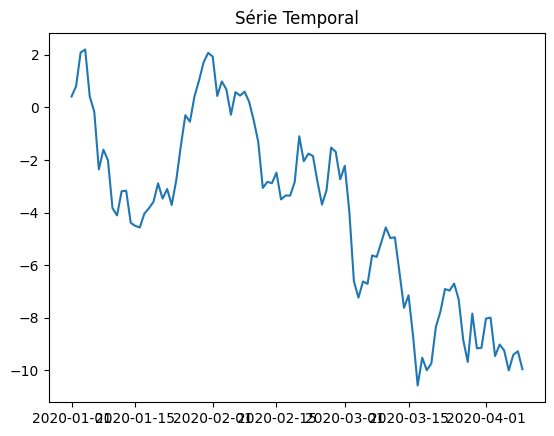

In [106]:
data = pd.Series(np.random.randn(100).cumsum())
data.index = pd.date_range(start="2020-01-01", periods=len(data), freq="D")

# Visualizar a série
plt.plot(data)
plt.title("Série Temporal")
plt.show()

teste de Dickey-Fuller Aumentado (ADF) para verificar se a série é estacionária.

In [107]:
result = adfuller(data)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.053655379321543
p-value: 0.7331955596020637


In [108]:
model = ARIMA(data, order=(1, 5, 2))
model_fit = model.fit()

# Resumo do modelo
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 5, 2)   Log Likelihood                -195.454
Date:                Sun, 24 Nov 2024   AIC                            398.909
Time:                        00:40:54   BIC                            409.124
Sample:                    01-01-2020   HQIC                           403.036
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5641      0.100     -5.621      0.000      -0.761      -0.367
ma.L1         -1.9861      4.477     -0.444      0.657     -10.762       6.789
ma.L2          0.9981      4.492      0.222      0.8

Visualizando os dados com uma maior precisão

Previsões futuras: 2020-04-10   -11.286036
2020-04-11   -13.409068
2020-04-12   -16.304672
2020-04-13   -20.058027
2020-04-14   -24.708709
2020-04-15   -30.335220
2020-04-16   -37.007304
2020-04-17   -44.812847
2020-04-18   -53.842701
2020-04-19   -64.199245
Freq: D, Name: predicted_mean, dtype: float64


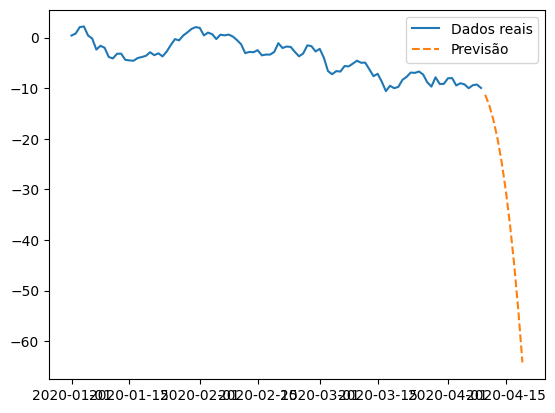

In [109]:
forecast = model_fit.forecast(steps=10)
print("Previsões futuras:", forecast)

# Visualizar previsões
plt.plot(data, label="Dados reais")
plt.plot(forecast, label="Previsão", linestyle="--")
plt.legend()
plt.show()

 Prophet é uma biblioteca desenvolvida pelo Facebook para modelar e prever séries temporais. Ele é especialmente útil para prever dados que apresentam padrões sazonais, tendências de longo prazo e outliers, além de lidar bem com lacunas e alterações nos dados.

Principais características do Prophet
Fácil de usar, mesmo para quem não tem muita experiência em modelagem de séries temporais.
Funciona bem com dados que têm padrões sazonais diários, semanais ou anuais.
Permite a inclusão de variáveis externas (regressoras adicionais).
Tolerante a valores ausentes ou outliers nos dados.

In [110]:


pip install prophet

In [111]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Criando uma serie temporal , olhando para os ultimos 365 dias a partir da data

In [112]:
# Criar uma série temporal de exemplo
data = pd.DataFrame({
    'ds': pd.date_range(start="2023-01-01", periods=365, freq='D'),  # Datas
    'y': [i + (5 * (i % 30)) + (10 if i % 100 == 0 else 0) for i in range(365)]  # Valores simulados
})

# Visualizar os dados
data.head()

,ds,y
0,2023-01-01,10
1,2023-01-02,6
2,2023-01-03,12
3,2023-01-04,18
4,2023-01-05,24


Criando o modelo

In [113]:
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5tyz_lnt/1dnxvov8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5tyz_lnt/p735zxt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85132', 'data', 'file=/tmp/tmp5tyz_lnt/1dnxvov8.json', 'init=/tmp/tmp5tyz_lnt/p735zxt9.json', 'output', 'file=/tmp/tmp5tyz_lnt/prophet_modely3owylwg/prophet_model-20241124004129.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:41:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:41:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Criando um data frame com datas Futuras , olhando para os 30 dias para frente com o maior numero de precisão

In [114]:
# Criar um DataFrame com datas futuras
future = model.make_future_dataframe(periods=30)  # Prever 30 dias à frente
forecast = model.predict(future)

# Visualizar as previsões
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()  # yhat = previsão

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01,68.217695,10.544916,125.777622
1,2023-01-02,69.365167,13.122589,124.886899
2,2023-01-03,69.780449,16.681539,131.959720
3,2023-01-04,69.807886,13.921291,125.414422
4,2023-01-05,70.223068,17.016647,126.642461


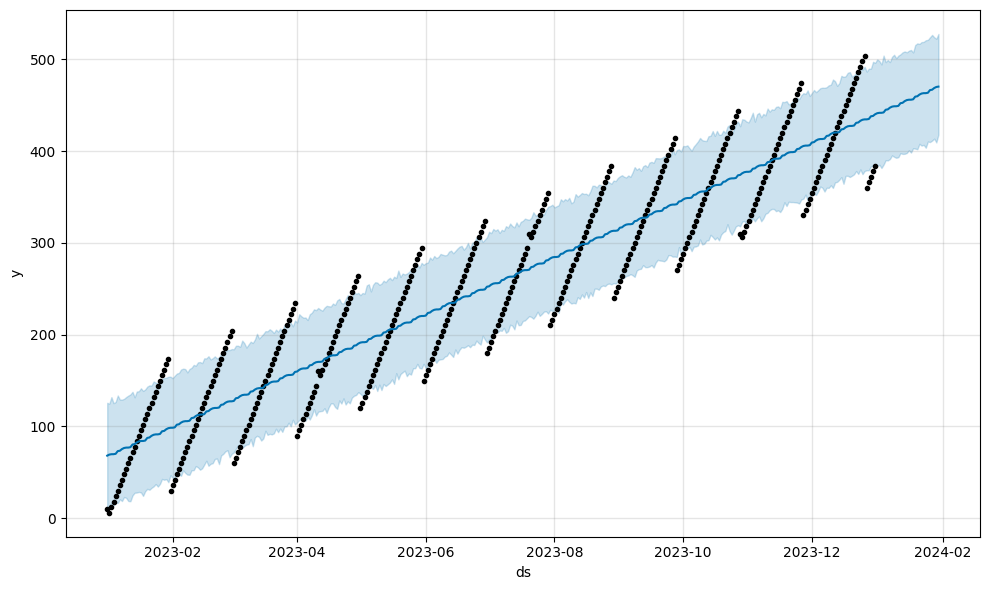

In [115]:
fig = model.plot(forecast)
plt.show()

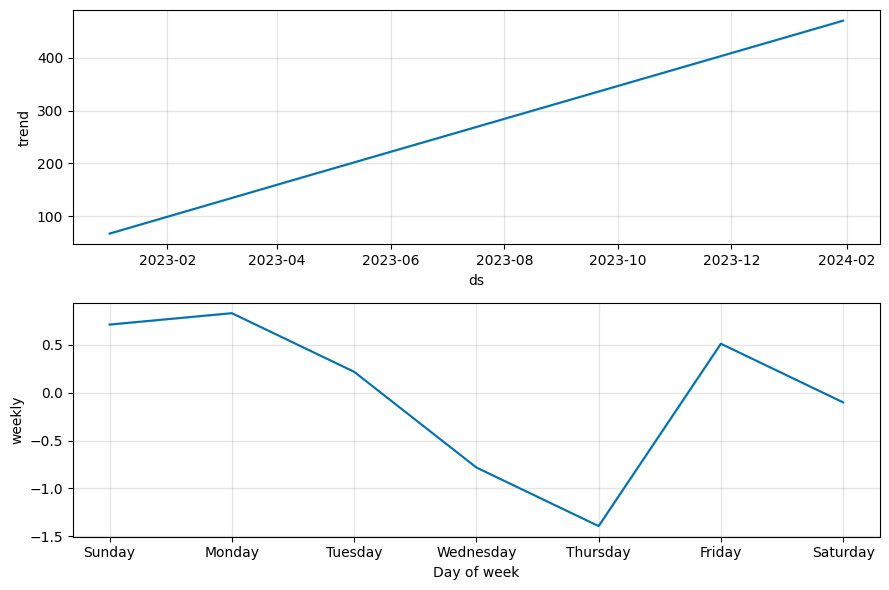

In [116]:
fig_components = model.plot_components(forecast)
plt.show()

Benefícios do Prophet
Fácil de configurar e interpretar: Requer menos ajuste em comparação com ARIMA.
Automatizado: Detecta tendências e sazonalidades automaticamente.
Personalizável: Permite ajustar sazonalidades, feriados e variáveis externas.

In [118]:
from prophet.make_holidays import make_holidays_df

# Criar um conjunto de feriados
holidays = pd.DataFrame({
    'holiday': 'feriado_importante',
    'ds': pd.to_datetime(['2020-02-14', '2023-12-25','2024-01-01']),
    'lower_window': 0,
    'upper_window': 1
})

model = Prophet(holidays=holidays)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5tyz_lnt/1l7gm5_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5tyz_lnt/3l5w7_lm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31515', 'data', 'file=/tmp/tmp5tyz_lnt/1l7gm5_1.json', 'init=/tmp/tmp5tyz_lnt/3l5w7_lm.json', 'output', 'file=/tmp/tmp5tyz_lnt/prophet_modelb1xyxujj/prophet_model-20241124004256.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:42:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
